Подключаем нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

Задаём параметры $\alpha, \theta, \lambda$ и n:

In [2]:
alpha = 0.95
first_theta = 1
second_theta = 10
lambda_value = 1
n = 100

Генерируем нужные нам выборки:

In [3]:
uniform_sample = sps.uniform.rvs(size=n, loc=0, scale=first_theta)
cauchy_sample = sps.cauchy.rvs(loc=first_theta,size=n)
pois_sample = sps.poisson.rvs(first_theta,size=n)
gamma_sample = sps.gamma.rvs(second_theta, scale=1.0/lambda_value,size=n)

Определим функцию, которую  по заданному распределению будет строить доверительные интервалы уровня доверия $\alpha$:

In [4]:
def draw_interval(sample, confidence_interval_left, confidence_interval_right):
    left_bound = confidence_interval_left(sample)
    right_bound = confidence_interval_right(sample)
    dots = range(1,101)
    plt.fill_between(dots, left_bound, right_bound, antialiased=True, \
                     edgecolor = 'green', facecolor = 'orange', hatch = '-', linewidth=3.)
    plt.show()

Рассмотрим задачу №1 (доверительные интервалы для равномерного распрделения). В пункте а) для статистики $\bar{X}$ доверительным интервалом будет: $(\frac{\bar{X}}{\frac{1}{2} + \sqrt{\frac{1}{12n\alpha}}}, \frac{\bar{X}}{\frac{1}{2} - \sqrt{\frac{1}{12n\alpha}}})$:

In [5]:
def uniform_mean_left_limit(sample):
    return [np.mean(sample[:i + 1]) / (1. / 2. + np.sqrt(1./(12. * (alpha) * (i + 1)))) 
                for i in range(len(sample))]
def uniform_mean_right_limit(sample):
    return [np.mean(sample[:i + 1]) / (1. / 2. - np.sqrt(1./(12. * (alpha) * (i + 1)))) 
                for i in range(len(sample))]

В пункте б) точным доверительным интервалом уровня $\alpha$ (для статистики $X_{(1)}$) будет $(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$:

In [6]:
def uniform_min_left_limit(sample):
    return [np.min(sample[:i + 1]) 
            for i in range(len(sample))]
def uniform_min_right_limit(sample):
    return [np.min(sample[:i + 1]) / float(1. - ((alpha)) ** (1. / len(sample[:i + 1]))) 
            for i in range(len(sample))]

В пункте в) точным доверительным интервалом уровня $\alpha$ (для статистики $X_{(n)}$) будет $(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$:

In [7]:
def uniform_max_left_limit(sample):
    return [np.max(sample[:i + 1])
            for i in range(len(sample))]
def uniform_max_right_limit(sample):
    return [np.max(sample[:i + 1]) / float(((1. - alpha)) ** (1. / len(sample[:i + 1]))) 
            for i in range(len(sample))]

Теперь строим интервалы для пунктов а, б, в №1:

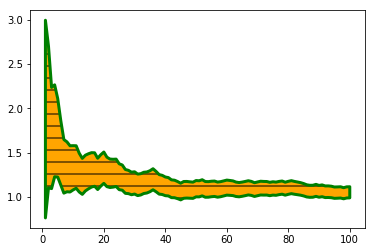

In [8]:
draw_interval(uniform_sample, uniform_mean_left_limit, uniform_mean_right_limit)

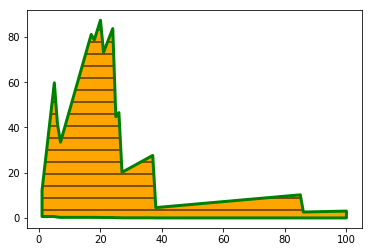

In [9]:
draw_interval(uniform_sample, uniform_min_left_limit, uniform_min_right_limit)

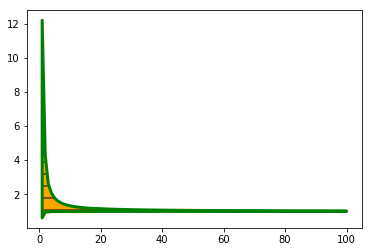

In [10]:
draw_interval(uniform_sample, uniform_max_left_limit, uniform_max_right_limit)

Судя по графикам, можем сказать, что интервал в случае со статистикой $\bar{X}$ вышел наилучшим.

Рассмотрим задачу №3. Доверительным интервалом для распределения Коши будет: $(\mu - \frac{\pi}{2\sqrt{n}}u_{\frac{1+\alpha}{2}},\mu - \frac{\pi}{2\sqrt{n}}u_{\frac{1-\alpha}{2}})$, где $\mu$ - медиана, а u - квантиль стандартного нормального распределения:

In [11]:
def cauchy_left_limit(sample):
    return [np.median(sample[:i + 1]) - (np.pi / 2.) * (sps.norm.ppf((1. + alpha) / 2.)) / 
            (np.sqrt(len(sample[:i + 1]))) for i in range(len(sample))]
def cauchy_right_limit(sample):
    return [np.median(sample[:i + 1]) - (np.pi / 2.) * (sps.norm.ppf((1. - alpha) / 2.)) / 
            (np.sqrt(len(sample[:i + 1]))) for i in range(len(sample))]

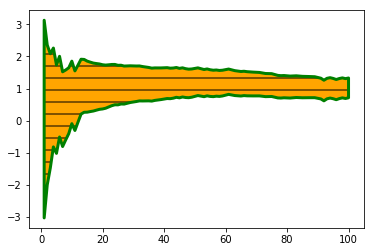

In [12]:
draw_interval(cauchy_sample, cauchy_left_limit, cauchy_right_limit)

В задаче №4 для пуассоновского распределения доверительным интервалом уровня доверия $\alpha$ будет $(\bar{X} - \sqrt{\frac{\bar{X}}{n}}u_{\frac{1+\alpha}{2}}, \bar{X} - \sqrt{\frac{\bar{X}}{n}}u_{\frac{1-\alpha}{2}})$

In [13]:
def poisson_left_limit(sample):
    return [np.mean(sample[:i + 1]) - (sps.norm.ppf((1. + alpha) / 2.)) * np.sqrt(np.mean(sample[:i + 1]) / (i + 1.)) 
            for i in range(len(sample))]
          
def poisson_right_limit(sample):
    return [np.mean(sample[:i + 1]) - (sps.norm.ppf((1. - alpha) / 2.)) * np.sqrt(np.mean(sample[:i + 1]) / (i + 1.)) 
            for i in range(len(sample))]


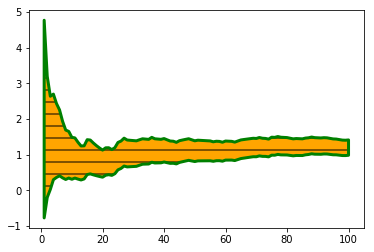

In [14]:
draw_interval(pois_sample, poisson_left_limit, poisson_right_limit)

В задаче №5 для гамма-распределения в случае, когда $\lambda$ известно, доверительным интервалом уровня доверия $\alpha$ будет $(\lambda \bar{X} - \sqrt{\frac{\bar{X}}{n}}u_{\frac{1+\alpha}{2}}, \lambda \bar{X} + \sqrt{\frac{\bar{X}}{n}}u_{\frac{1+\alpha}{2}})$:

In [15]:
def gamma_known_lambda_left_limit(sample):
    return [lambda_value * np.mean(sample[:i + 1]) - (sps.norm.ppf((1. + alpha) / 2.)) * np.sqrt(np.mean(sample[:i + 1]) / (i + 1.))
            for i in range(len(sample))]
def gamma_known_lambda_right_limit(sample):          
    return [lambda_value * np.mean(sample[:i + 1]) + (sps.norm.ppf((1. + alpha) / 2.)) * np.sqrt(np.mean(sample[:i + 1]) / (i + 1.))
            for i in range(len(sample))]

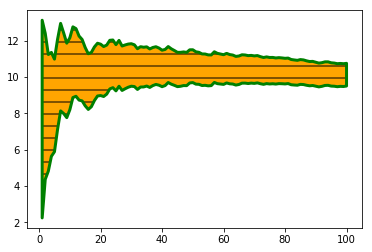

In [16]:
draw_interval(gamma_sample,gamma_known_lambda_left_limit, gamma_known_lambda_right_limit)

Теперь оценим вероятность попадания истинного значения $\theta$ в интервал. Для этого мы будем генерировать 1000 выборок, посчитаем для каждой из них интервалы и определим, сколько раз в интервалы попадает истинное значение $\theta$. Но первым делом определим размеры выборок first_size и second_size, а также функции, считающие левые и правые границы интевала:

In [17]:
first_size = 10
second_size = 100

def uniform_mean_left_limit_all(sample):
    return np.mean(sample) / (1. / 2. + np.sqrt(1./(12. * (alpha) * len(sample)))) 
def uniform_mean_right_limit_all(sample):
    return np.mean(sample) / (1. / 2. - np.sqrt(1./(12. * (alpha) * len(sample))))

def uniform_min_left_limit_all(sample):
    return np.min(sample)
def uniform_min_right_limit_all(sample):
    return np.min(sample) / float(1. - ((alpha)) ** (1. / len(sample)))

def uniform_max_left_limit_all(sample):
    return np.max(sample)
def uniform_max_right_limit_all(sample):
    return np.max(sample) / float(((1. - alpha)) ** (1. / len(sample)))

def cauchy_left_limit_all(sample):
    return np.median(sample) - (np.pi / 2.) * (sps.norm.ppf((1. + alpha) / 2.)) / (np.sqrt(len(sample)))
def cauchy_right_limit_all(sample):
    return np.median(sample) - (np.pi / 2.) * (sps.norm.ppf((1. - alpha) / 2.)) / (np.sqrt(len(sample)))

def poisson_left_limit_all(sample):
    return np.mean(sample) - (sps.norm.ppf((1. + alpha) / 2.)) * np.sqrt(np.mean(sample) / len(sample)) 
def poisson_right_limit_all(sample):
    return np.mean(sample) - (sps.norm.ppf((1. - alpha) / 2.)) * np.sqrt(np.mean(sample) / len(sample))

def gamma_known_lambda_left_limit_all(sample):
    return lambda_value * np.mean(sample) - (sps.norm.ppf((1. + alpha) / 2.)) * np.sqrt(np.mean(sample) / len(sample))
def gamma_known_lambda_right_limit_all(sample):          
    return lambda_value * np.mean(sample) + (sps.norm.ppf((1. + alpha) / 2.)) * np.sqrt(np.mean(sample) / len(sample))

Теперь определим функцию, которая по заданному распределению будет считать искомую вероятность для размеров выборок first_size и second_size:

In [18]:
def probability(samples_little, samples_big, left_limit, right_limit, theta_value):
    count_little = 0
    count_big = 0
    left_limits_little = np.array([left_limit(samples_little[i]) for i in range(1000)])
    right_limits_little = np.array([right_limit(samples_little[i]) for i in range(1000)])
    left_limits_big = np.array([left_limit(samples_big[i]) for i in range(1000)])
    right_limits_big = np.array([right_limit(samples_big[i]) for i in range(1000)])
    for i in range(1000):
        if left_limits_little[i] < theta_value and theta_value < right_limits_little[i]:
            count_little += 1
    for i in range(1000):
        if left_limits_big[i] < theta_value and theta_value < right_limits_big[i]:
            count_big += 1
    print("Для размера выборки first_size = 10, вероятность равна:", float(count_little) / 1000.0)
    print("Для размера выборки second_size = 100, вероятность равна:", float(count_big) / 1000.0)

Генерируем 1000 выборок из равномерного распределения и считаем вероятности для всех интервалов:

In [19]:
uniform_samples_little = np.array([
    sps.uniform.rvs(size=first_size, loc=0, scale=first_theta)
    for i in range(1000)
])
uniform_samples_big = np.array([
    sps.uniform.rvs(size=second_size, loc=0, scale=first_theta)
    for i in range(1000)
])

Для первого интервала (статистика $\bar{X}$):

In [20]:
probability(uniform_samples_little, uniform_samples_big, 
            uniform_mean_left_limit_all, uniform_mean_right_limit_all, first_theta)

Для размера выборки first_size = 10, вероятность равна: 0.666
Для размера выборки second_size = 100, вероятность равна: 0.707


Для второго интервала (статистика $X_{(1)})$:

In [21]:
probability(uniform_samples_little, uniform_samples_big, 
            uniform_min_left_limit_all, uniform_min_right_limit_all, first_theta)

Для размера выборки first_size = 10, вероятность равна: 0.949
Для размера выборки second_size = 100, вероятность равна: 0.943


Для третьего интервала (статистика $X_{(n)}$):

In [22]:
probability(uniform_samples_little, uniform_samples_big, 
            uniform_max_left_limit_all, uniform_max_right_limit_all, first_theta)

Для размера выборки first_size = 10, вероятность равна: 0.948
Для размера выборки second_size = 100, вероятность равна: 0.951


Генерируем 1000 выборок из распределения Коши и считаем вероятность:

In [23]:
cauchy_samples_little = np.array([
    sps.cauchy.rvs(loc=first_theta, size=first_size)
    for i in range(1000)
])
cauchy_samples_big = np.array([
    sps.cauchy.rvs(loc=first_theta, size=second_size)
    for i in range(1000)
])

In [24]:
probability(cauchy_samples_little, cauchy_samples_big, 
            cauchy_left_limit_all, cauchy_right_limit_all, first_theta)

Для размера выборки first_size = 10, вероятность равна: 0.923
Для размера выборки second_size = 100, вероятность равна: 0.943


Генерируем 1000 выборок из распределения Пуассона и считаем вероятность:

In [25]:
pois_samples_little = np.array([
    sps.poisson.rvs(first_theta, size=first_size)
    for i in range(1000)
])
pois_samples_big = np.array([
    sps.poisson.rvs(first_theta, size=second_size)
    for i in range(1000)
])

In [26]:
probability(pois_samples_little, pois_samples_big, 
            poisson_left_limit_all, poisson_right_limit_all, first_theta)

Для размера выборки first_size = 10, вероятность равна: 0.918
Для размера выборки second_size = 100, вероятность равна: 0.951


Генерируем 1000 выборок из гамма-распределения и считаем вероятность:

In [27]:
gamma_samples_little = np.array([
    sps.gamma.rvs(second_theta, scale=1.0/lambda_value, size=first_size)
    for i in range(1000)
])
gamma_samples_big = np.array([
    sps.gamma.rvs(second_theta, scale=1.0/lambda_value, size=second_size)
    for i in range(1000)
])

In [28]:
probability(gamma_samples_little, gamma_samples_big, 
            gamma_known_lambda_left_limit_all, gamma_known_lambda_right_limit_all, second_theta)

Для размера выборки first_size = 10, вероятность равна: 0.94
Для размера выборки second_size = 100, вероятность равна: 0.949
